# Importing libraries

In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Importing dataset

In [6]:
from tensorflow.keras.datasets import boston_housing

In [8]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data(
                                        path='boston_housing.npz', 
                                        test_split=0.2, seed=42)

57026/57026 [==============================] - 0s 0us/step


In [9]:
x_train

array([[9.1780e-02, 0.0000e+00, 4.0500e+00, ..., 1.6600e+01, 3.9550e+02,
        9.0400e+00],
       [5.6440e-02, 4.0000e+01, 6.4100e+00, ..., 1.7600e+01, 3.9690e+02,
        3.5300e+00],
       [1.0574e-01, 0.0000e+00, 2.7740e+01, ..., 2.0100e+01, 3.9011e+02,
        1.8070e+01],
       ...,
       [3.0410e-02, 0.0000e+00, 5.1900e+00, ..., 2.0200e+01, 3.9481e+02,
        1.0560e+01],
       [5.2058e-01, 0.0000e+00, 6.2000e+00, ..., 1.7400e+01, 3.8845e+02,
        9.5400e+00],
       [2.5199e-01, 0.0000e+00, 1.0590e+01, ..., 1.8600e+01, 3.8943e+02,
        1.8060e+01]])

# Data pre-processing

In [10]:
minmax_scaler = MinMaxScaler()
x_train_normal = minmax_scaler.fit_transform(x_train)
x_test_normal = minmax_scaler.transform(x_test)

# Creating model

In [30]:
tf.random.set_seed(42)

boston_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1),
])

boston_model.compile(loss="mae", optimizer=tf.keras.optimizers.SGD(), 
                     metrics="mae")

history = boston_model.fit(x_train_normal, y_train, epochs=50, verbose=0)

In [31]:
boston_model.evaluate(x_test_normal, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 3.0168 - mae: 3.0168


[3.0167694091796875, 3.0167694091796875]

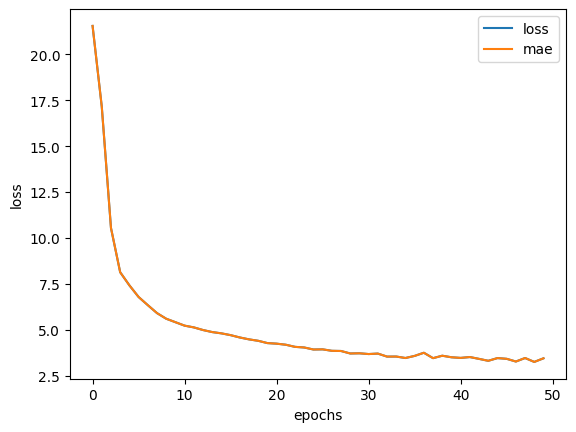

In [32]:
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()